# Exercise 1 computer assignments solutions

## 1 Basic definitions

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(1)

#### (a)

In [ ]:
# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self, activation_func):
        super().__init__()
        self.layer1 = nn.Linear(5, 5, bias=False) #exclude the biases to simplify analysis and implementation
        self.layer2 = nn.Linear(5, 5, bias=False)
        self.layer3 = nn.Linear(5, 5, bias=False)
        self.activation = activation_func

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        return x

In [3]:
# Define activation functions
activations = {
    'Tanh': torch.tanh,
    'ReLU': torch.relu,
    'Linear': lambda x: x
}

#### (b)

In [4]:
# Create 5D-grid with fixed random values for the last 4 dimensions
x1_range = torch.linspace(-10.0, 10.0, steps=1000).unsqueeze(1)
xrest_fixed = torch.randn(4)
inputs = torch.cat([x1_range, xrest_fixed.repeat(x1_range.size(0), 1)], dim=1)

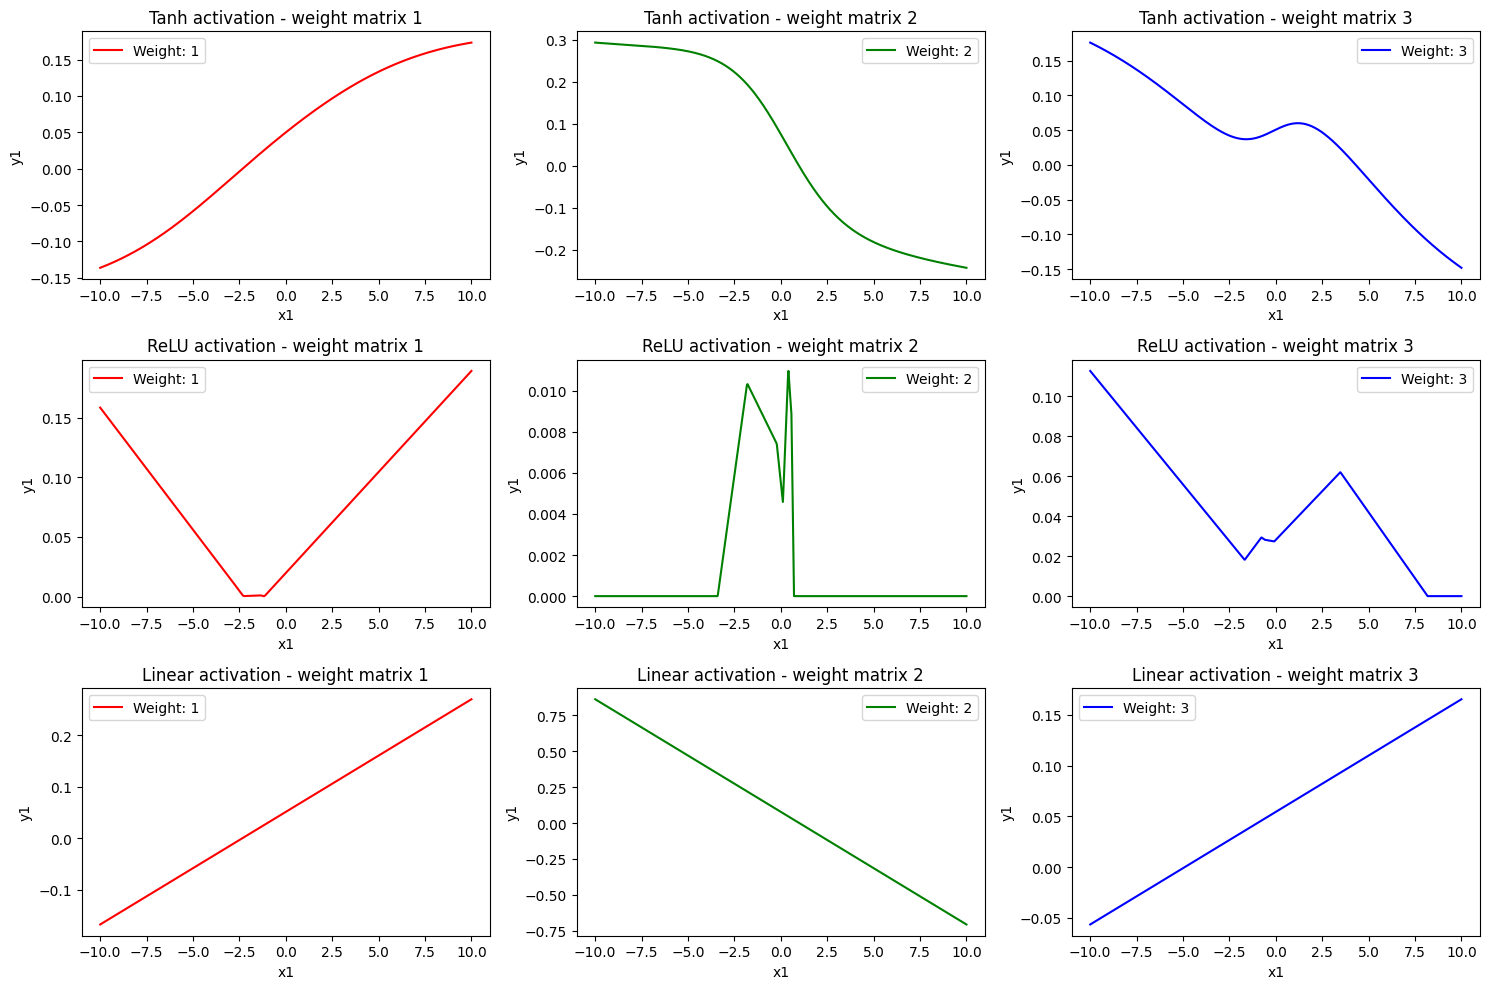

In [5]:
colors = ['r', 'g', 'b']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i in range(3): # loop over rows of plot
    activation_name, activation_func = list(activations.keys())[i],list(activations.values())[i]
    for j in range(3): # loop over cols of plot
        torch.manual_seed(j) # use same random weight matrix for all activations
        model = NeuralNetwork(activation_func=activation_func) # initialize network with random weights (each weight matrix drawn from Uniform(-√0.2,√0.2))
        with torch.no_grad():
            y = model(inputs)
        axs[i, j].plot(x1_range.numpy(), y[:, 0].numpy(), label = f"Weight: {j+1}", color = colors[j])
        axs[i, j].set_title(f'{activation_name} activation - weight matrix {j+1}')
        axs[i, j].set_xlabel('x1')
        axs[i, j].set_ylabel('y1')
        axs[i, j].legend()
plt.tight_layout()
plt.show()

## 2 Optimization

### 1.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import copy

np.random.seed(1)

#### (a)

In [7]:
# Define function f(w)
def f(w):
    return np.exp(-w[0]**2 - 2*(w[1]-1)**2) + np.exp(-(w[0]-1)**2 - 2*w[1]**2)

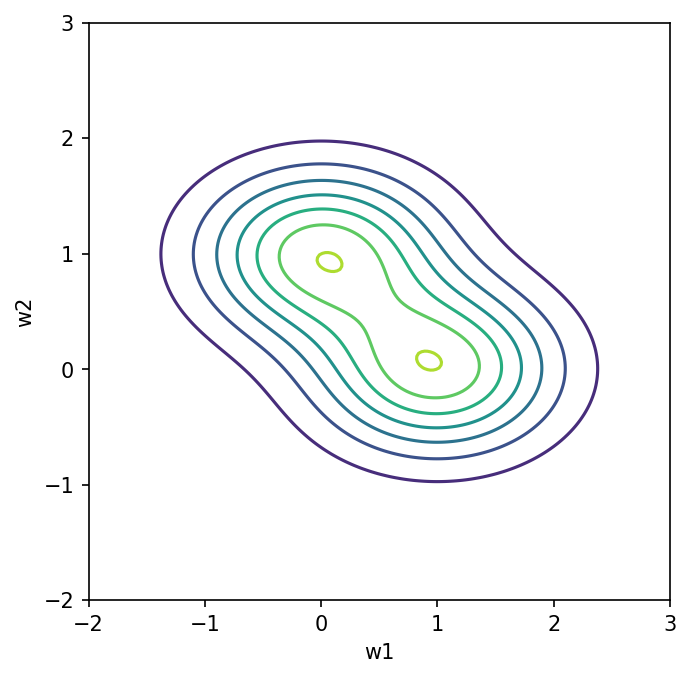

In [8]:
vec_f = np.vectorize(f, signature="(n)->()")
w1 = np.linspace(-2.0, 3.0, 200)
w2 = np.linspace(-2.0, 3.0, 200)
W1, W2 = np.meshgrid(w1, w2)
Fs = vec_f(np.stack((W1, W2), axis=2))
plt.figure(dpi=150, figsize=(5, 5))
plt.contour(W1, W2, Fs)
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

#### (b)

The gradient is given by: 
$$
\nabla f(w) = \begin{bmatrix}
-2w_{1}\exp(-w_{1}^{2}-2(w_{2}-1)^{2})-2(w_{1}-1)\exp(-(w_{1}-1)^{2}-2w_{2}^{2}) \\
-4(w_{2}-1)\exp(-w_{1}^{2}-2(w_{2}-1)^{2})-4w_{2}\exp(-(w_{1}-1)^{2}-2w_{2}^{2})
\end{bmatrix}
$$

In [9]:
def grad_f(w):
    term1 = np.exp(-w[0]**2 - 2*(w[1]-1)**2)
    term2 = np.exp(-(w[0]-1)**2 - 2*w[1]**2)
    entry1 = -2*w[0] * term1 - 2*(w[0]-1) * term2
    entry2 = -4*(w[1]-1) * term1 - 4*w[1] * term2
    return np.asarray([entry1, entry2])

#### (c)

In [10]:
w1 = np.asarray([0.2, 0.5])
w2 = np.asarray([0.5, 0.2])
w3 = np.asarray([1.0, 1.0])

In [11]:
hs = [1e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1.0]
max_iters = 10000

In [12]:
best_hs = dict()
for initial_w in [w1, w2, w3]:
    best_h = 0.0
    results = dict()
    print(f"Initial position: {initial_w}")
    print()
    for h in hs:
        print(f"Step size: {h}")
        w = copy.deepcopy(initial_w)
        num_iters = 0
        while True:
            grad = grad_f(w)
            w = w + h * grad
            num_iters += 1
            if np.linalg.norm(grad) < 1e-4 or num_iters > max_iters:
                break
        print(f"w: {w}, f(w): {f(w)}, number of iterations: {num_iters}")
        results[h] = num_iters
    print()
    best_h = min(results, key=results.get)
    print(f"Best h: {best_h}")
    best_hs[str(initial_w)] = best_h
    print()

Initial position: [0.2 0.5]

Step size: 0.001
w: [0.07077738 0.92925843], f(w): 1.0600767875322297, number of iterations: 5781
Step size: 0.01
w: [0.07077633 0.92925883], f(w): 1.0600767876432156, number of iterations: 576
Step size: 0.03
w: [0.07077248 0.92926027], f(w): 1.060076788032138, number of iterations: 191
Step size: 0.1
w: [0.07076146 0.9292644 ], f(w): 1.0600767889920608, number of iterations: 56
Step size: 0.3
w: [0.07073876 0.92927288], f(w): 1.0600767902568526, number of iterations: 17
Step size: 1.0
w: [0.52860109 1.06150831], f(w): 0.8346167749860788, number of iterations: 10001

Best h: 0.3

Initial position: [0.5 0.2]

Step size: 0.001
w: [0.9292226  0.07074157], f(w): 1.0600767875308472, number of iterations: 5804
Step size: 0.01
w: [0.92922378 0.07074113], f(w): 1.0600767876548216, number of iterations: 578
Step size: 0.03
w: [0.92922671 0.07074003], f(w): 1.0600767879525057, number of iterations: 191
Step size: 0.1
w: [0.92923252 0.07073785], f(w): 1.0600767884962

#### (d)

Initial position: [0.2 0.5]
Step size: 0.3
w: [0.07073876 0.92927288], f(w): 1.0600767902568526, number of iterations: 17

Initial position: [0.5 0.2]
Step size: 0.3
w: [0.9292512  0.07073087], f(w): 1.0600767898155774, number of iterations: 16

Initial position: [1. 1.]
Step size: 0.3
w: [0.0707473  0.92926969], f(w): 1.0600767898935284, number of iterations: 20



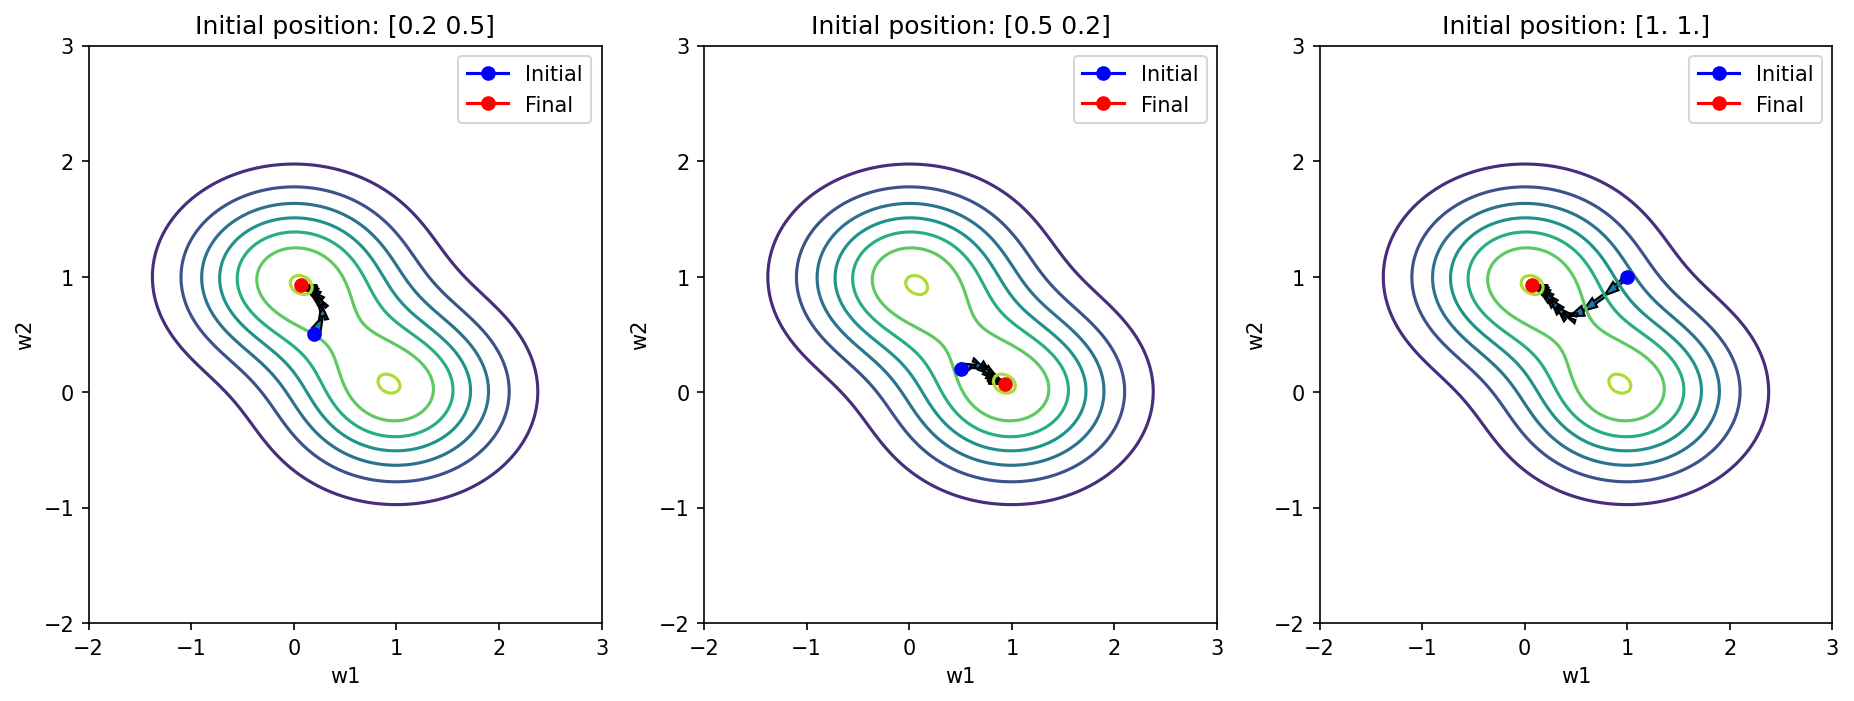

In [13]:
fs = dict()
ws = dict()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=150)

for idx, initial_w in enumerate([w1, w2, w3]):
    print(f"Initial position: {initial_w}")
    h = best_hs[str(initial_w)]
    print(f"Step size: {h}")
    w = copy.deepcopy(initial_w)
    fs[str(initial_w)] = []
    ws[str(initial_w)] = []
    current_fs = fs[str(initial_w)]
    current_ws = ws[str(initial_w)]
    num_iters = 0
    while True:
        fs[str(initial_w)].append(f(w))
        ws[str(initial_w)].append(w)
        grad = grad_f(w)
        w = w + h * grad
        num_iters += 1
        if np.linalg.norm(grad) < 1e-4 or num_iters > max_iters:
            break
    current_fs.append(f(w))
    current_ws.append(w)
    ax = axes[idx]  # Select the correct subplot
    ax.contour(W1, W2, Fs)
    ax.plot(current_ws[0][0], current_ws[0][1], marker="o", color="blue", label="Initial")
    for i in range(len(current_ws)-1):
        ax.arrow(current_ws[i][0], current_ws[i][1], current_ws[i+1][0] - current_ws[i][0], current_ws[i+1][1] - current_ws[i][1],
                 length_includes_head=True, width=0.03)
    ax.plot(current_ws[-1][0], current_ws[-1][1], marker="o", color="red", label="Final")
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.legend()
    ax.set_title(f"Initial position: {initial_w}")

    print(f"w: {w}, f(w): {f(w)}, number of iterations: {num_iters}")
    print()
    results[h] = num_iters
plt.show()

#### (e)

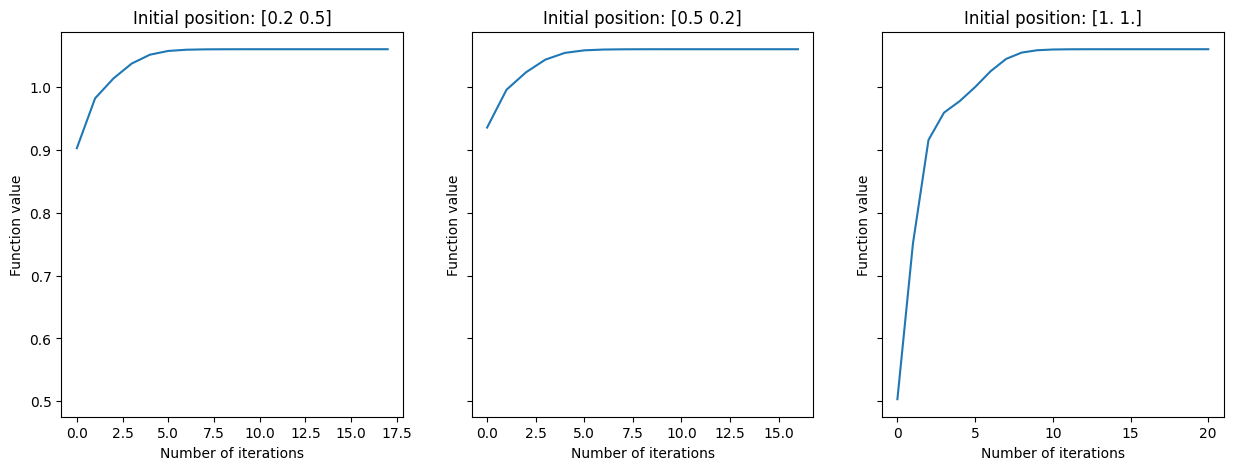

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, [current_initial_w, current_fs] in enumerate(fs.items()):
    axs[i].plot(current_fs)
    axs[i].set_xlabel("Number of iterations")
    axs[i].set_ylabel("Function value")
    axs[i].set_title(f"Initial position: {current_initial_w}")
plt.show()


#### (f)

Depending on the initial positions, the gradient method can converge to different local maximas, with no guarantee to converge to the global maxima.